In [1]:
# To support both python 2 and python 3
###PAT 这段代码貌似是通用的，兼容Python2 和 3， 导入common包，然后写好了保存图片的方法
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "titanic_explore"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
data_train = pd.read_csv("train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe() ###此方法自动过滤掉了非数字型的属性

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Isham, Miss. Ann Elizabeth",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Saving figure 乘客属性分布


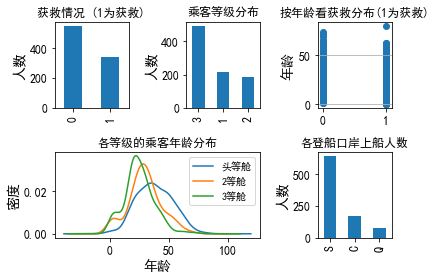

In [6]:
fig = plt.figure()
fig.set(alpha = 0.2)

plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind = 'bar')
plt.title("获救情况 (1为获救)")
plt.ylabel("人数")

plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind = 'bar')
plt.ylabel("人数")
plt.title("乘客等级分布")

plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄")
plt.grid(b = True, which='major', axis='y')
plt.title("按年龄看获救分布(1为获救)")

plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各等级的乘客年龄分布")
plt.legend(("头等舱", "2等舱", "3等舱"), loc='best')

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")
save_fig("乘客属性分布")
plt.show()

    获救  未获救
1  136   80
2   87   97
3  119  372
Saving figure 各等级乘客获救情况


<Figure size 432x288 with 0 Axes>

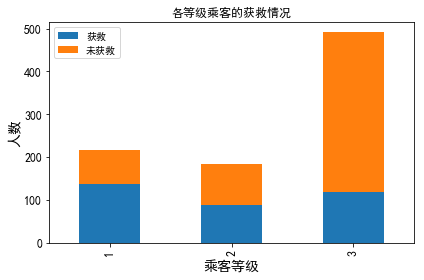

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts() ###过滤并统计各条目数量
df = pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("各等级乘客的获救情况")
plt.xlabel("乘客等级")
plt.ylabel("人数")
save_fig("各等级乘客获救情况")
plt.show()

Saving figure 性别与获救情况


<Figure size 432x288 with 0 Axes>

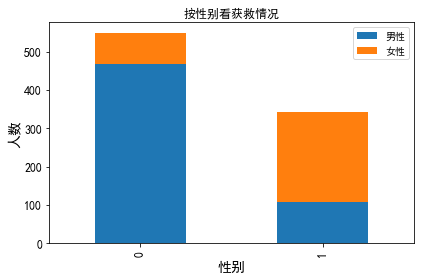

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
#统计获救的男性和女性的数量，未获救的男性和女性的数量，然后作图，对比获救的男性和女性的数量
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
# print(type(Survived_m))
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({'男性':Survived_m, '女性':Survived_f})
# print(df)
df.plot(kind='bar', stacked=True)###DataFrame直接支持画图
plt.title("按性别看获救情况")
plt.xlabel("性别") 
plt.ylabel("人数")
save_fig("性别与获救情况")
plt.show()

Saving figure 各等级舱各性别获救情况


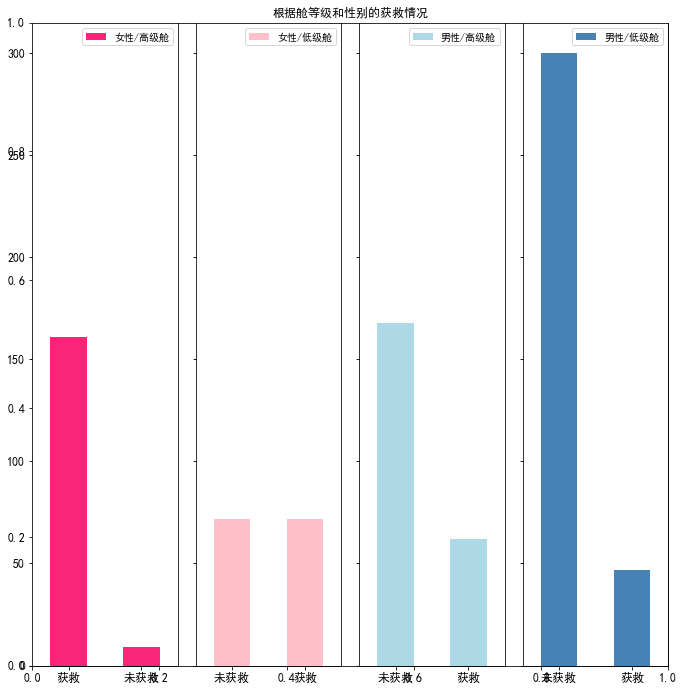

In [9]:
 #然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')
save_fig("各等级舱各性别获救情况")
plt.show()

Saving figure 各港口登陆乘客获救情况


<Figure size 432x288 with 0 Axes>

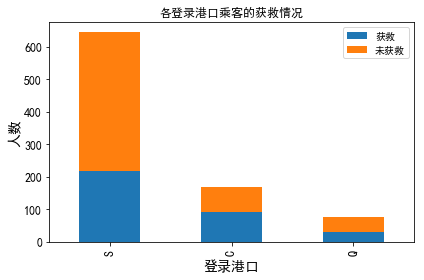

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 
save_fig("各港口登陆乘客获救情况")
plt.show()

In [11]:
g = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)
###这两个特征没有明显关系，可以暂放

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [12]:
# data_train.Cabin.value_counts()

Saving figure Cabin有无和获救情况


<Figure size 432x288 with 0 Axes>

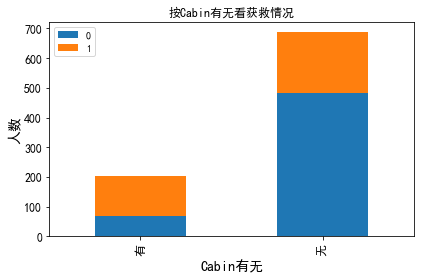

In [13]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title("按Cabin有无看获救情况")
plt.xlabel("Cabin有无") 
plt.ylabel("人数")
save_fig("Cabin有无和获救情况")
plt.show()
### Cabin缺失严重，也可先暂放，不考虑作为特征

In [14]:
##TODO group by


In [15]:
from sklearn.ensemble import RandomForestRegressor
data_train = pd.read_csv("train.csv")
###使用RandomForestRegressor做简单拟合，补全年龄属性
def set_missing_ages(df):
    ### 默认使用所有的数值型特征，作为拟合的特征变量
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
#     known_age = age_df[age_df.Age.notnull()].as_matrix()
#     unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    ###将DataFrame转化为ndarray
    ###将数据集划分为已知年龄和未知年龄
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    print(known_age)
    y = known_age[:, 0] ###目标空间
    X = known_age[:, 1:] ###特征空间
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1:])
    ###用拟合数据补全
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

In [16]:
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

[[22.      7.25    0.      1.      3.    ]
 [38.     71.2833  0.      1.      1.    ]
 [26.      7.925   0.      0.      3.    ]
 ...
 [19.     30.      0.      0.      1.    ]
 [26.     30.      0.      0.      1.    ]
 [32.      7.75    0.      0.      3.    ]]


In [17]:
### get_dummies 用于对字符串类型的属性，进行one-hot编码
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
# type(dummies_Cabin)
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
### 拼接
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
### 丢弃
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [18]:
# import sklearn.preprocessing as preprocessing
# scaler = preprocessing.StandardScaler()
# age_scale_param = scaler.fit(df['Age'])
# df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
# fare_scale_param = scaler.fit(df['Fare'])
# df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
# df
### 上述代码报错，主要原因是新版的
# I think you're using a new scikit-learn version and it's throwing an error 
# because in the new version everything has to be a 2d matrix, even a single column or row.
# （新版本中所有东西都必须是一个2D矩阵，即使是一个简单的column或row）

# It even says: Reshape your data either using array.reshape(-1, 1) if your
#     data has a single feature or array.reshape(1, -1) if it contains a single sample.
# （使用array.reshape(-1, 1)重新调整你的数据）
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].to_numpy().reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].to_numpy().reshape(-1, 1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].to_numpy().reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].to_numpy().reshape(-1, 1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [19]:
### 参考 https://www.cnblogs.com/volcao/p/9089716.html
### 均值归一化和均值方差归一化
### 测试归一化
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# type(data)
print(data)
scaler = StandardScaler()
# X_scaled = preprocessing.scale(data)
print(scaler.fit(data))
print(scaler.mean_) ## 输出平均值
print(scaler.scale_) ## 输出标准差
print(scaler.transform(data))

[[0, 0], [0, 0], [1, 1], [1, 1]]
StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [20]:
#### 从df中取出我们要的特征，然后用LogisticRegression进行建模
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:, 0]

X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=1e-06, verbose=0,
                   warm_start=False)

In [21]:
### 对测试数据进行同样的处理
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
#### 同样需要修改成2D array
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].to_numpy().reshape(-1, 1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].to_numpy().reshape(-1, 1), fare_scale_param)
df_test.head(10)

C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.0,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [22]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until



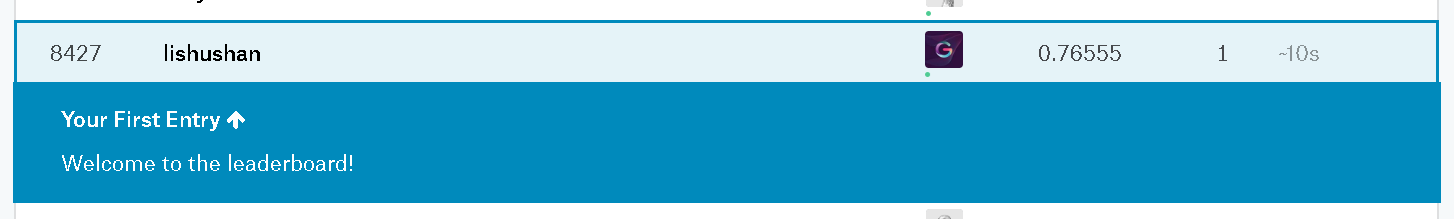

### 结果看起来还可以，但是这仅仅是baseline，还有很大的空间优化
### 看过Andrew Ng老师的machine Learning课程的同学们，知道，我们应该分析分析模型现在的状态了，是过/欠拟合？，以确定我们需要更多的特征还是更多数据，或者其他操作。我们有一条很著名的learning curves对吧。不过在现在的场景下，先不着急做这个事情，我们这个baseline系统还有些粗糙，先再挖掘挖掘。

### 在Jupyter notebook中编辑公式https://www.cnblogs.com/laoduan/p/7641698.html
columns 代表列标识

clf.coef_.T 表示每个特征对应的系数即 $\theta^T$


In [23]:
## 老老实实先把得到的model系数和feature关联起来看看。
### columns 代表列标识
### clf.coef_.T 表示每个特征对应的系数即 
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})
# train_df

,columns,coef
0,SibSp,[-0.34423557339834204]
1,Parch,[-0.10491593635739863]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.9021091411927653]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.417263367691313]
7,Sex_female,[1.9565700634858303]
8,Sex_male,[-0.677421540813337]
9,Pclass_1,[0.3411579931585791]


### 交叉验证，调整模型的效果
### 解决FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning. 指定一个solver
https://laobadao.github.io/2017/10/25/logistic-regression/index.html


In [24]:
from sklearn.model_selection import train_test_split ### 数据分片
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
clf = linear_model.LogisticRegression(solver="liblinear", C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:, 1:]
y = all_data.values[:,0]
print(cross_val_score(clf, X, y, cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [25]:
### 分割数据，按照 训练数据：CV数据 = 7：3 的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)
print(type(split_train))
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver="liblinear", C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:, 1:], train_df.values[:, 0])

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions=clf.predict(cv_df.values[:, 1:])

origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train["PassengerId"]
                                  .isin(split_cv[predictions != cv_df.values[:, 0]]["PassengerId"].values)]
bad_cases.head(10)
### 筛选出badCase ，来发现一些端倪

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


### 特征工程
现在有了"train_df" 和 “vc_df” 两个数据部分，前者用于训练model，后者用于评定和选择模型。可以开始可劲折腾了。
随便列一些可能可以做的优化操作：
1. Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
2. Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
3. Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
4. Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
5. 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
6. 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
7. Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。


### 学习曲线 解决过拟合和欠拟合问题
我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。

C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


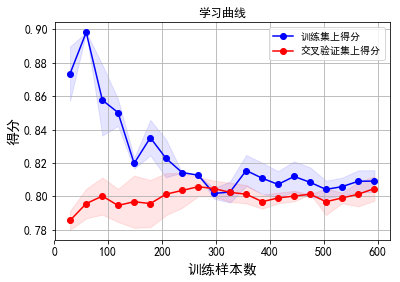

(0.8065696844854024, 0.018258876711338634)

In [33]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(0.05, 1., 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs
                                                           , train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("训练样本数")
        plt.ylabel("得分")
        plt.gca().invert_yaxis()
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis() ###y轴上线调转
        plt.show()
        
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, "学习曲线", X, y)

        

### 模型融合(model ensemble)
『模型融合(model ensemble)很重要！』
太重要了，几乎所有kaggle的获奖模型，都要经过模型融合，这一步是简单高效提高准确率的方式。
### 由于titanic是一个分类问题，因此需要使用BaggingClassifier，而不是BagggingRegressor
### 这是我第一次bagging 提交后结果变糟糕的原因

In [36]:
from sklearn.ensemble import BaggingClassifier
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values


# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
### 由于titanic是一个分类问题，因此需要使用BaggingClassifier，而不是BagggingRegressor
### 这是我第一次bagging 提交后结果变糟糕的原因
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingClassifier(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)

C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### 一个机器学习问题的解决步骤
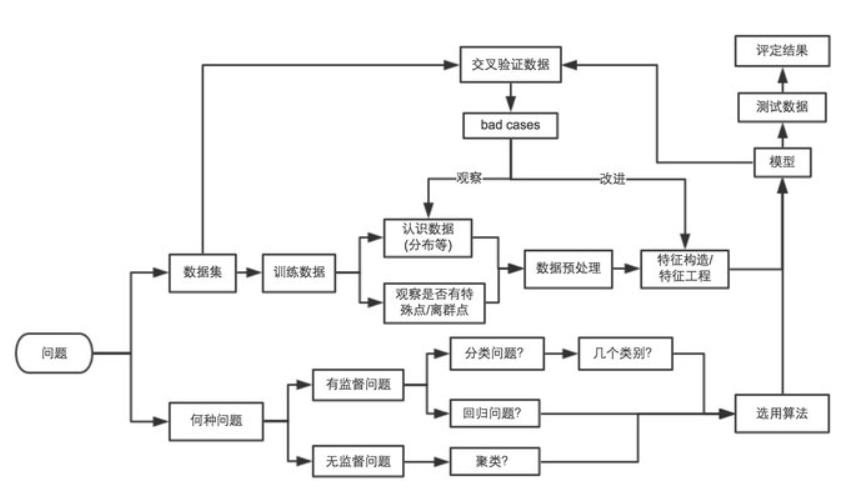

### 心得：
对于任何的机器学习问题，不要一上来就追求尽善尽美，先用自己会的算法撸一个baseline的model出来，再进行后续的分析步骤，一步步提高。

在问题的结果过程中：

『对数据的认识太重要了！』
『数据中的特殊点/离群点的分析和处理太重要了！』
『特征工程(feature engineering)太重要了！』
『模型融合(model ensemble)太重要了！』
 ———————————————— 
版权声明：本文为CSDN博主「寒小阳」的原创文章，遵循CC 4.0 by-sa版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/han_xiaoyang/article/details/49797143